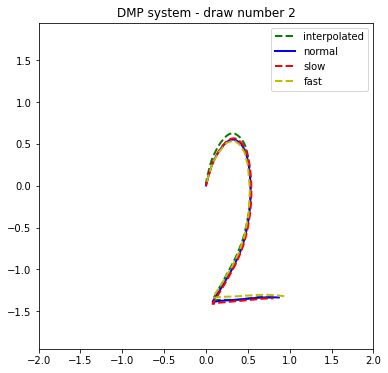

In [1]:
"""
Copyright (C) 2016 Travis DeWolf

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

Modified: Xiyang Yeh
"""

import numpy as np
import matplotlib.pyplot as plt

import dmp_pkg.dmp_discrete

y_des = np.load("./resource/2.npz")["arr_0"].T
y_des -= y_des[:, 0][:, None]

# test normal run
dmp = dmp_pkg.dmp_discrete.DMPs_discrete(n_dmps=2, n_bfs=500, ay=np.ones(2) * 10.0)
y_track = []
dy_track = []
ddy_track = []

y_interp = dmp.imitate_path(y_des=y_des)
y_track_normal, _, _ = dmp.rollout(tau=1)
y_track_slow, _, _ = dmp.rollout(tau=10)
y_track_fast, _, _ = dmp.rollout(tau=0.3333)

plt.figure(1, figsize=(6, 6))

plt.plot(y_des[0, :], y_interp[1, :], "g--", lw=2, label="interpolated")
plt.plot(y_track_normal[:, 0], y_track_normal[:, 1], "b", lw=2, label="normal")
plt.plot(y_track_slow[:, 0], y_track_slow[:, 1], "--r", lw=2, label="slow")
plt.plot(y_track_fast[:, 0], y_track_fast[:, 1], "--y", lw=2, label="fast")
plt.legend()
plt.title("DMP system - draw number 2")

plt.axis("equal")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
